In [91]:
import autograd.numpy as np
from autograd import grad
import nlopt, numpy as npf
import matplotlib.pyplot as plt

import sys
sys.path.append('../')

import use_autograd
use_autograd.use = 1
import rcwa
from utils import test_grad

In [92]:
t = 150e-9
Period = 3e-6

c0 = 299792458
rho = 2.329e3
mp = 1e-4;
I = 1e10;
A = 10
vf = 0.2*c0
lam0 = 1.2e-6

N = 20
v = np.linspace(0,vf,N)
freq_list = np.sqrt((c0-v)/(c0+v))
gamma = 1./np.sqrt(1-(v/c0)**2)

Nx = 50
Ny = 50

In [96]:
nG = 101
# lattice vector
Lx = Period/lam0
Ly = Period/lam0
L1 = [Lx,0.]
L2 = [0.,Ly]

# planewave excitation
p_amp = 0.
s_amp = 1.
p_phase = 0.
s_phase = 0.
# frequency and angles
theta = 0.
phi = 0.

# now consider three layers: vacuum + patterned + vacuum
epsuniform1 = 1.
epsdiff = 11.3
epsbkg = 1
epsuniform3 = 1.

thick1 = 1.
thick2 = t/lam0
thick3 = 1.

In [97]:
ctrl = 0
vec = []
def fun_Distance(dof,Qabs):
    mT = mp + t*A*rho*np.mean(dof)

    R = np.array([])
    for freq in freq_list:
        freqcmp = freq*(1+1j/2/Qabs)
        obj = rcwa.RCWA_obj(nG,L1,L2,freqcmp,theta,phi,verbose=0)
        obj.Add_LayerUniform(thick1,epsuniform1)
        obj.Add_LayerGrid(thick2,epsdiff,epsbkg,Nx,Ny)
        obj.Add_LayerUniform(thick3,epsuniform3)
        obj.Init_Setup(Gmethod=0)

        obj.MakeExcitationPlanewave(p_amp,p_phase,s_amp,s_phase,order = 0)
        obj.GridLayer_getDOF(dof)
        Rtmp,_ = obj.RT_Solve()

        R = np.append(R,Rtmp)

    integrand = mT/R*gamma*v/(1-v/c0)**2
    #D = c0/2/I/A*np.trapz(integrand,x=v)/1e9
    D = c0/2/I/A*(np.sum(integrand)-integrand[0]/2-integrand[-1]/2)*(v[1]-v[0])/1e9

    if 'autograd' not in str(type(D)):
        global ctrl
        global vec
        vec = npf.copy(dof)
        
        print ctrl,np.mean(R),D
        if npf.mod(ctrl,10)==0:
            plt.figure();
            plt.imshow(np.reshape(dof,(Nx,Ny)))
            plt.colorbar()
            plt.show()
            
        ctrl +=1
    return D

# Qabs = 20

0 0.36749329688363336 17.87536013108311


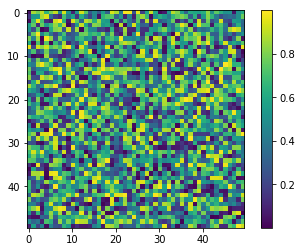

1 0.3672713767742003 17.816662556518885
2 0.36449457252868545 17.338893837365585
3 0.31259287344722636 15.189800946086502
4 0.20221864853654595 13.064463731952095
5 0.34459841434084004 15.596368049175107
6 0.35920015499726565 13.642129455258042
7 0.37150606205487824 10.286016885677096
8 0.4116157060344204 8.299019929822236
9 0.377312443733165 8.319621784565888
10 0.41061211764155975 7.732285763076617


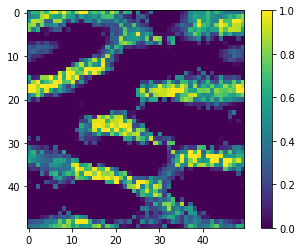

11 0.43322826817352 7.1773933646810475
12 0.44175575800952904 6.927374041482682
13 0.46566229190473757 6.467579931814986
14 0.2680834036567494 8.296765703415193
15 0.4041465661418755 6.835243243024791
16 0.46434923343121415 6.270454199076874
17 0.4784543392479411 5.896257737870758
18 0.3636613184835831 6.953364079169143
19 0.43476932568340043 5.893571305930656
20 0.47582378249737134 5.73037374923321


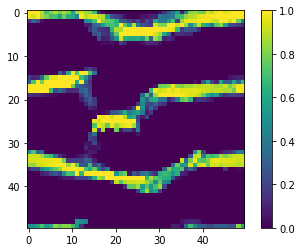

21 0.48164952202275746 5.507984325188787
22 0.4717109322072323 5.410341561128896
23 0.48177777559018037 5.357819581529335
24 0.4840502954622271 5.3050556733026974
25 0.48632610149617667 5.246320719220931
26 0.4885547369030775 5.165705022665138
27 0.4615870016492628 5.411254777900249
28 0.47930051461618495 5.206253704689753
29 0.48908761890054936 5.120858100572752
30 0.4942317861910996 5.09800169198336


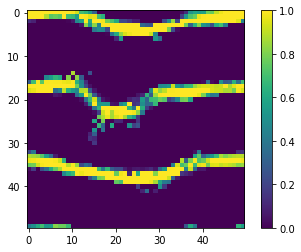

31 0.49202581549802477 5.070347647619047
32 0.4965217875850726 5.001735318130045
33 0.4623108714322212 5.142323691025098
34 0.4864956474558717 4.964947644526587
35 0.5013051446461327 4.929626287945572
36 0.4967500662536165 4.882610375307498
37 0.5039594836046496 4.8217727170305125
38 0.45315116056282256 5.1827358353448
39 0.48819655217718533 4.849382010017181
40 0.5004380225729026 4.799817963306668


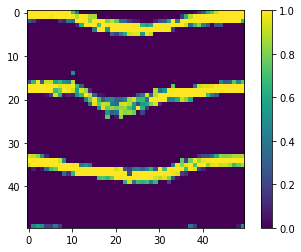

41 0.5084397074934799 4.745461042429939
42 0.48214288367624125 4.840558290873971
43 0.5003930939972541 4.722587951291349
44 0.5132528306144066 4.707188011706641
45 0.5057202986156739 4.6884566172661
46 0.5103795606460333 4.676203439879507
47 0.5088785648563038 4.670513747769727
48 0.5095528608232901 4.652735572218293
49 0.507546696651335 4.6647233836615145
50 0.5099964478434514 4.643424636550554


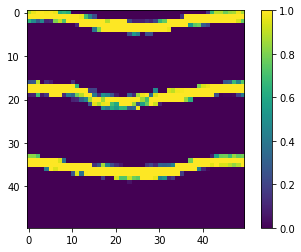

51 0.5066185758261058 4.650729063435514
52 0.5100905268904766 4.635523519446746
53 0.5110269231751131 4.631749982750887
54 0.5104207452982314 4.619387341314992
55 0.5158292180831648 4.664852346560595
56 0.5165802911326925 4.628764339469635
57 0.5139578606919204 4.613223791198258
58 0.5114792789480656 4.608814202173361
59 0.5133300736027105 4.605641492624493
60 0.5088042239651046 4.601958131609769


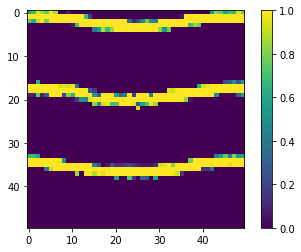

61 0.5180005218222237 4.607985454358324
62 0.5138658361185573 4.593159490541829
63 0.5129179536525256 4.590738833722654
64 0.5144114777109895 4.584387810382036
65 0.5016570031038523 4.611890944716372
66 0.5107196926149146 4.580397061900431
67 0.5166011508287401 4.578597485460334
68 0.5109614276293023 4.5785306880440775
69 0.5141452434287862 4.571739231596184


KeyboardInterrupt: 

In [98]:
Qabs = 20.
fun = lambda dof: fun_Distance(dof,Qabs)
grad_fun = grad(fun)
def fun_nlopt(dof,gradn):
    gradn[:] = grad_fun(dof)
    return fun(dof)

ndof = Nx*Ny
#init = np.ones(ndof)
init = np.random.random(ndof)
lb=np.zeros(ndof,dtype=float)
ub=np.ones(ndof,dtype=float)

opt = nlopt.opt(nlopt.LD_MMA, ndof)
opt.set_lower_bounds(lb)
opt.set_upper_bounds(ub)

opt.set_xtol_rel(1e-5)
opt.set_maxeval(100)

opt.set_min_objective(fun_nlopt)
x = opt.optimize(init)

# Qabs = 100

70 0.7791618463215741 3.1208657649326845


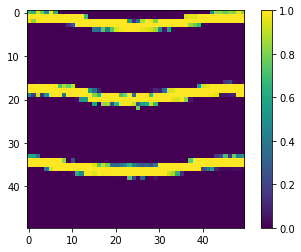

71 0.7791769819774735 3.1208318492717706
72 0.7793200783389095 3.1205179687586564
73 0.7810314220233414 3.117590411832635
74 0.7864275593394539 3.1120802326726733
75 0.7713931823875395 3.118767497085667
76 0.7821286262968008 3.1080229360219547
77 0.7855529699880368 3.1064653850839576
78 0.7740719027978823 3.1143555273745105
79 0.7827055452246328 3.1031976658049065
80 0.7810624136660914 3.103119138175581


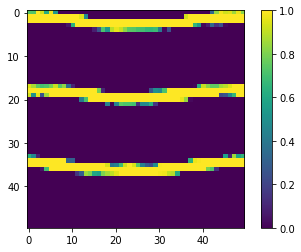

81 0.783777084643811 3.10419174820037
82 0.7825998206573203 3.1009883798957847
83 0.7822154114833226 3.10298297489559
84 0.782735730902312 3.100447523812498
85 0.7822741567847802 3.100175261647223
86 0.7826339614546155 3.0998622433750547
87 0.7825126493588455 3.099723930990815
88 0.7822034064927303 3.0987049731973797
89 0.7841647644608749 3.1141449081890613
90 0.7835105458635312 3.098892393924468


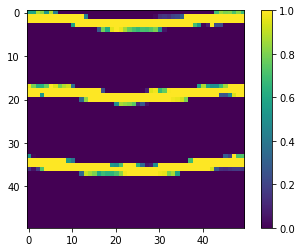

91 0.782764062049799 3.0982554842066237


KeyboardInterrupt: 

In [99]:
Qabs = 100.
fun = lambda dof: fun_Distance(dof,Qabs)
grad_fun = grad(fun)
def fun_nlopt(dof,gradn):
    gradn[:] = grad_fun(dof)
    return fun(dof)

ndof = Nx*Ny
#init = np.ones(ndof)
init = npf.copy(vec)
lb=np.zeros(ndof,dtype=float)
ub=np.ones(ndof,dtype=float)

opt = nlopt.opt(nlopt.LD_MMA, ndof)
opt.set_lower_bounds(lb)
opt.set_upper_bounds(ub)

opt.set_xtol_rel(1e-5)
opt.set_maxeval(100)

opt.set_min_objective(fun_nlopt)
x = opt.optimize(init)

# Qabs = 1000

92 0.8622618681946543 2.8369311453765507
93 0.8622655449891911 2.836927515266946
94 0.862302015705325 2.8368917316019613
95 0.8627718431158753 2.836463532758068
96 0.8657629078887827 2.833682210274615
97 0.8542670971895516 2.864637781745231
98 0.86455981119765 2.830417662850811
99 0.8576710590749144 2.9677911546627698
100 0.8671419789511159 2.8304802018339936


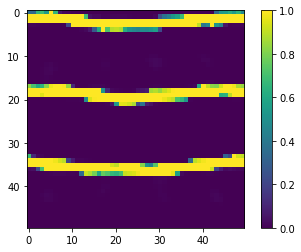

101 0.866214029041861 2.82736301492349
102 0.8640688899455778 2.870017875945783
103 0.8670606716964162 2.8257251584663168
104 0.8673259872656155 2.8351800490937347
105 0.8679816955666348 2.823699436141302
106 0.8601873357016807 2.8356524769824047
107 0.8667896439262904 2.8222919980293395
108 0.8549548451453243 2.9607578027979504
109 0.867274797086508 2.821551326565405
110 0.8680233544412109 2.8235948540689053


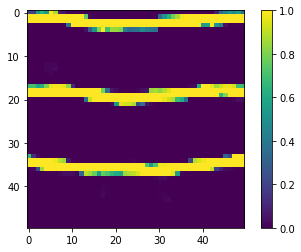

111 0.8675860263770401 2.8211008934502533
112 0.8674531385494346 2.81973639568987
113 0.834283240471829 2.872527890984017


KeyboardInterrupt: 

In [100]:
Qabs = 1000
fun = lambda dof: fun_Distance(dof,Qabs)
grad_fun = grad(fun)
def fun_nlopt(dof,gradn):
    gradn[:] = grad_fun(dof)
    return fun(dof)

ndof = Nx*Ny
#init = np.ones(ndof)
init = npf.copy(vec)
lb=np.zeros(ndof,dtype=float)
ub=np.ones(ndof,dtype=float)

opt = nlopt.opt(nlopt.LD_MMA, ndof)
opt.set_lower_bounds(lb)
opt.set_upper_bounds(ub)

opt.set_xtol_rel(1e-5)
opt.set_maxeval(100)

opt.set_min_objective(fun_nlopt)
x = opt.optimize(init)

# Qabs = Inf

114 0.846761690385142 2.8256990754871993
115 0.8355728850479993 2.9185755528779436
116 0.8472970879986652 2.8234051888840264
117 0.8346569682545109 2.928343030935809
118 0.8476276038958742 2.822150692274013
119 0.8450764314429924 2.838760852470809
120 0.8477326162736338 2.821664414844461


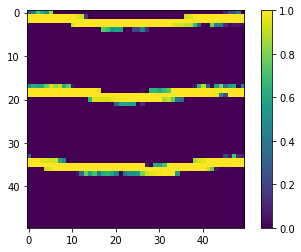

121 0.8449178781660033 2.8403657207414486


KeyboardInterrupt: 

In [101]:
Qabs = np.inf
fun = lambda dof: fun_Distance(dof,Qabs)
grad_fun = grad(fun)
def fun_nlopt(dof,gradn):
    gradn[:] = grad_fun(dof)
    return fun(dof)

ndof = Nx*Ny
#init = np.ones(ndof)
init = npf.copy(vec)
lb=np.zeros(ndof,dtype=float)
ub=np.ones(ndof,dtype=float)

opt = nlopt.opt(nlopt.LD_MMA, ndof)
opt.set_lower_bounds(lb)
opt.set_upper_bounds(ub)

opt.set_xtol_rel(1e-5)
opt.set_maxeval(100)

opt.set_min_objective(fun_nlopt)
x = opt.optimize(init)